In [11]:
from nltk.tokenize import TweetTokenizer
import nltk
tknzr = TweetTokenizer()


In [12]:
class Words:
    def __init__(self, name):
        self.name = name
        self.word2index = {}
        self.word2count = {}
        self.index2word = {}
        self.n_words = 0
      
    def index_words(self, sentence):
        for word in tknzr.tokenize(sentence.lower()
                                   .replace(".net", "dotnet")
                                   .replace("react.js", "react")
                                   .replace("reactjs", "react")
                                   .replace("full stack", "full-stack")
                                   .replace("node", "nodejs")
                                  ):
            self.index_word(word)

    def index_word(self, word):
        if word not in self.word2index:
            self.word2index[word] = self.n_words
            self.word2count[word] = 1
            self.index2word[self.n_words] = word
            self.n_words += 1
        else:
            self.word2count[word] += 1

In [13]:
import pandas as pd

In [14]:
df = pd.read_csv('seek_jobs_Sydney.csv')

In [15]:
df.head()

,id,listingDate,location,title,teaser,companyName
0,35604941,2018-02-25T23:43:06Z,Sydney,Linux Software Engineer,Join our world leading team in creating unique...,Fluffy Spider Technologies
1,35675260,2018-03-17T13:00:00Z,Sydney,Web/Software Full Stack Developer,Proactive solution orientated developers who i...,None
2,35775325,2018-03-18T01:30:19Z,Sydney,Integration <b>Developer</b>,Looking for as highly skilled Integration <b>D...,Horizon Consulting
3,35775320,2018-03-18T01:27:52Z,Sydney,Data <b>Developer</b>/Reporting/BI - Mid to Se...,Global Automotive Software Company Requires Da...,The Ruby Group
4,35775432,2018-03-18T03:06:47Z,Sydney,UI <b>Developer</b>,Global bank - User Interface - Customer facing...,TEKsystems


In [16]:
titles = df["title"].values
teasers = df["teaser"].values
words = Words('words')

In [17]:
for title in titles:
    words.index_words(title)
for teaser in teasers:
    words.index_words(teaser)

In [18]:
filter_dict = {'asp.net':1,'nodejs':1,'full-stack':1,'python':1,'php':1,'ios':1,'android':1,'docker':1,'aws':1,'javascript':1,'vue':1,'java':1,'dotnet':1,'react':1,'angularjs':1,'angular':1}

In [19]:
data = []
labels = []

for k,v in sorted(words.word2count.items(), key=lambda x:x[1],reverse=True):
    if k in filter_dict:
        labels.append(k)
        data.append(v)

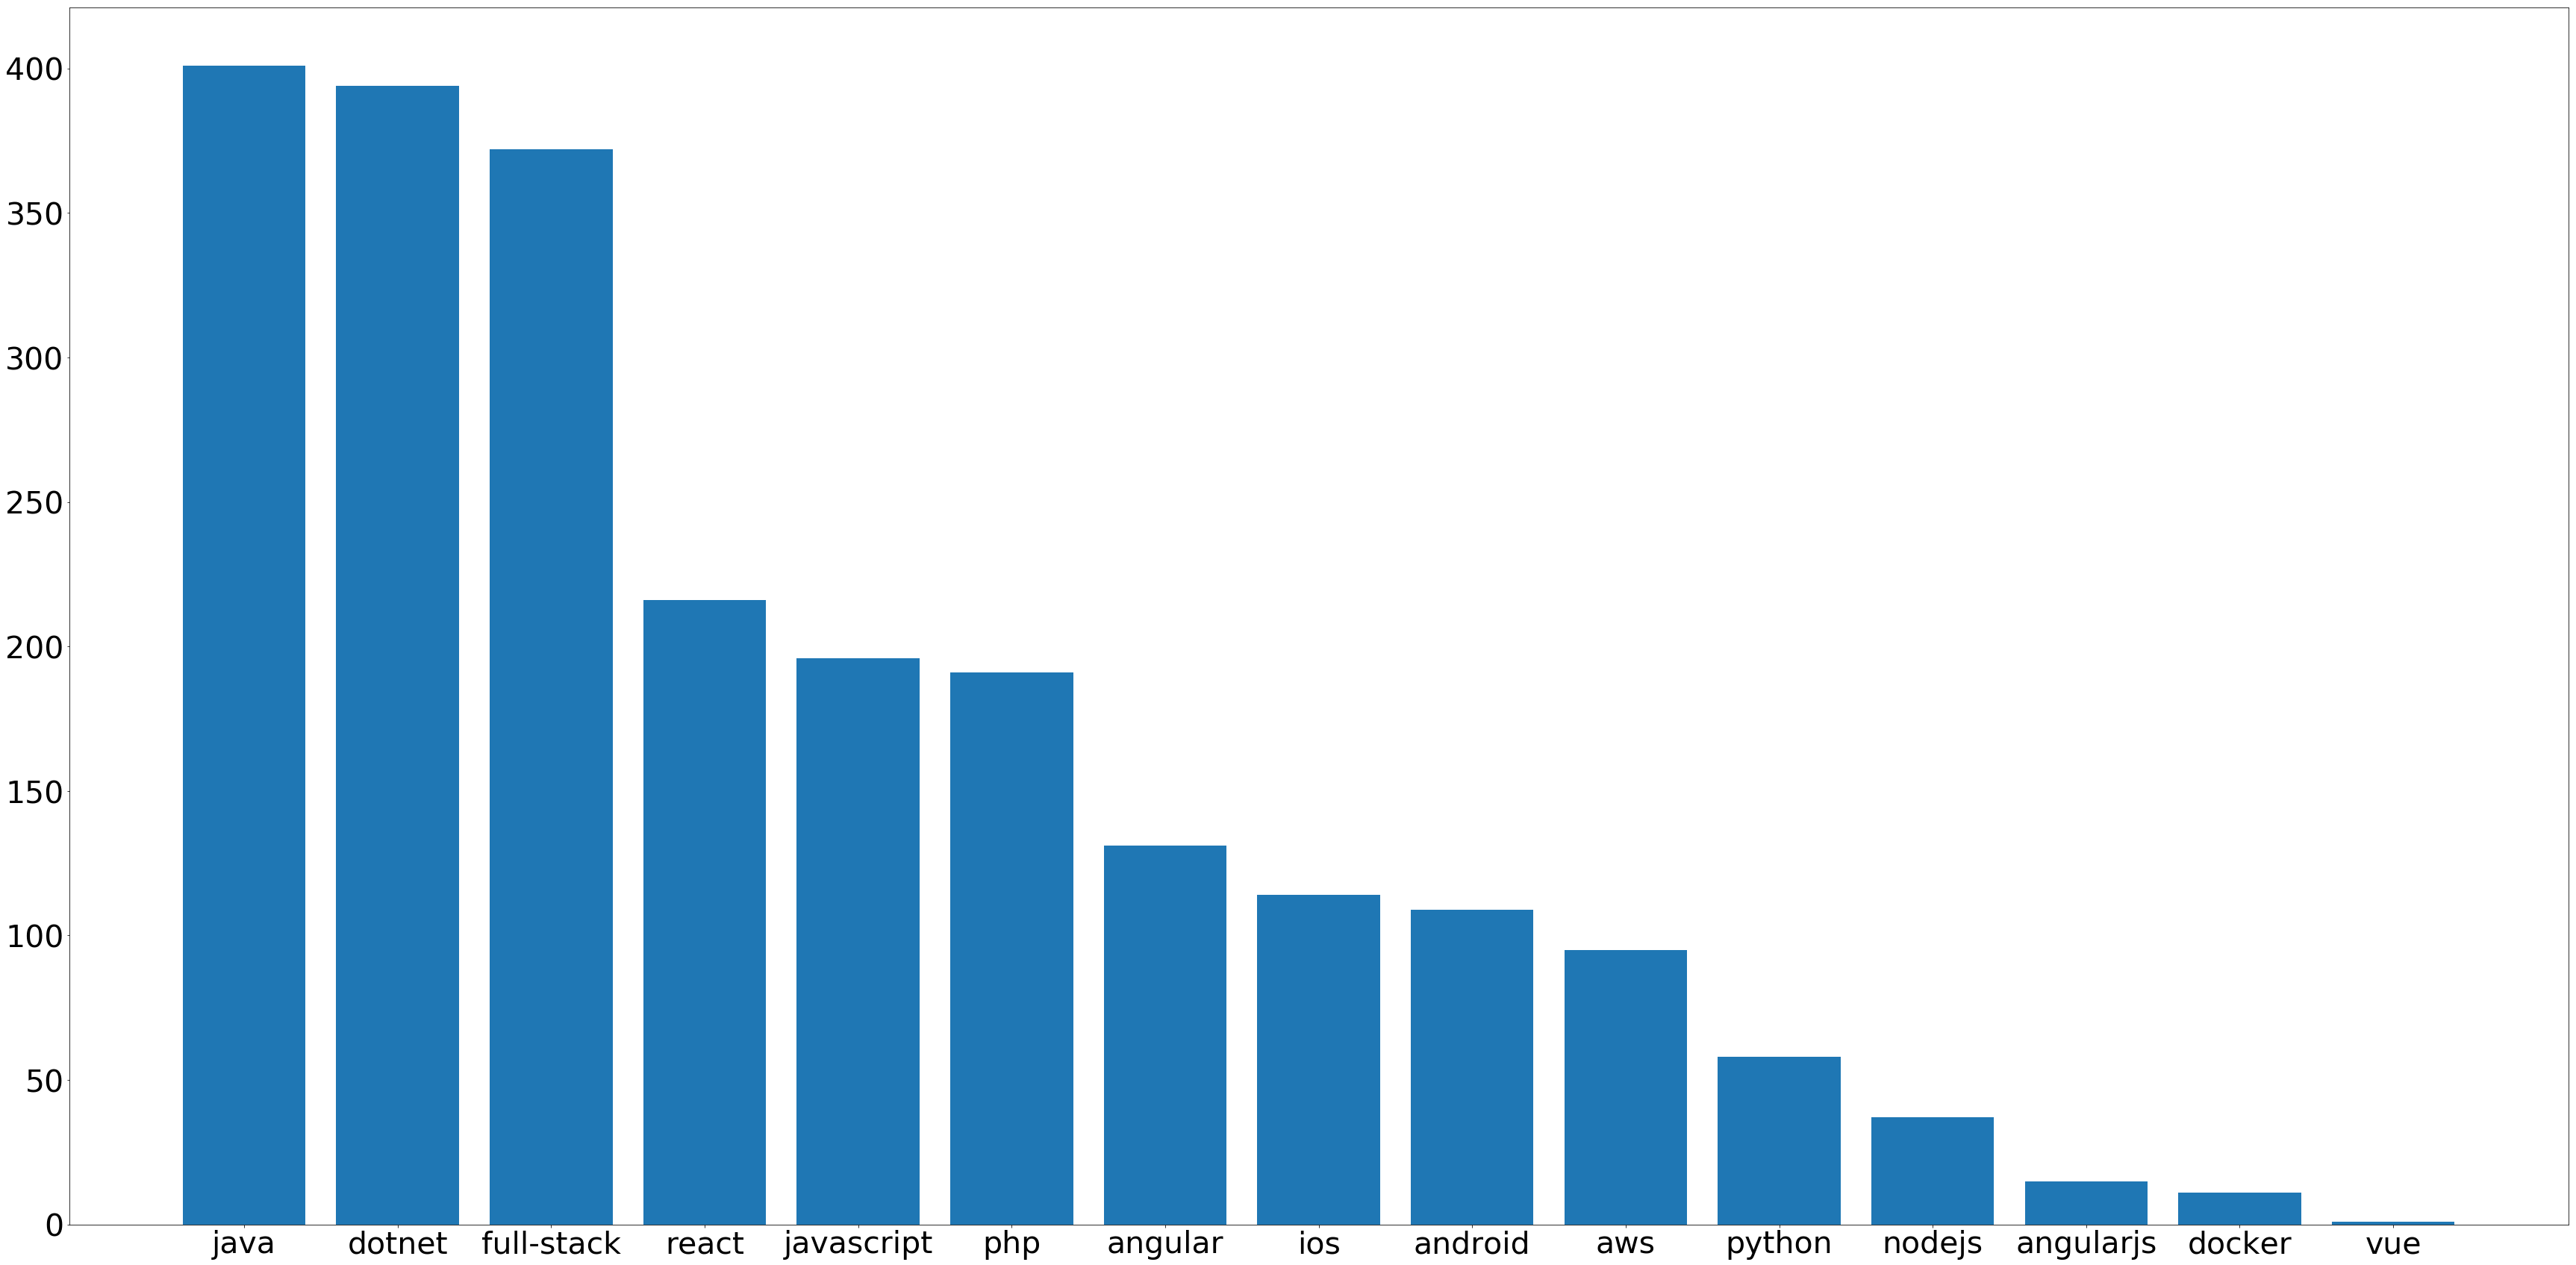

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(60,30))
plt.bar(range(len(data)), data, tick_label=labels)
plt.tick_params(labelsize=41)
plt.show()